# U.S. Medical Insurance Costs

In [59]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import statsmodels.api as sm

In [60]:
# Load the insurance dataset
dataframe = pd.read_csv('insurance.csv')

## Compute basic descriptive statistics

In [61]:
# Compute basic descriptive statistics
descriptives = dataframe.describe()

# Calculate mode for categorical variables
mode = dataframe.mode().iloc[0]

# Display descriptive statistics and mode
print("Descriptive Statistics:")
print(descriptives)
print("\nMode:")
print(mode)

# Average charges by different categories
avg_charges_by_smoker = dataframe.groupby('smoker')['charges'].mean()
avg_charges_by_bmi = dataframe.groupby('bmi')['charges'].mean()
avg_charges_by_children = dataframe.groupby('children')['charges'].mean()
avg_charges_by_region = dataframe.groupby('region')['charges'].mean()
avg_charges_by_sex = dataframe.groupby('sex')['charges'].mean()

print("\nAverage Charges by Smoker Status:")
print(avg_charges_by_smoker)

print("\nAverage Charges by BMI Bracket:")
print(avg_charges_by_bmi)

print("\nAverage Charges by Number of Children:")
print(avg_charges_by_children)

print("\nAverage Charges by Region:")
print(avg_charges_by_region)

print("\nAverage Charges by Sex:")
print(avg_charges_by_sex)

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Mode:
age                18
sex              male
bmi              32.3
children            0
smoker             no
region      southeast
charges     1639.5631
Name: 0, dtype: object

Average Charges by Smoker Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average Charges by BMI Bracket:
bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.1921

## Create visualizations: histograms, box plots, and scatter plots

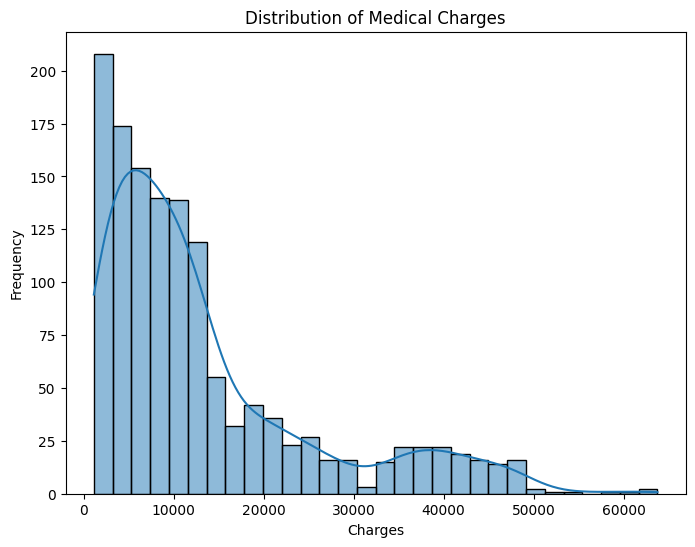

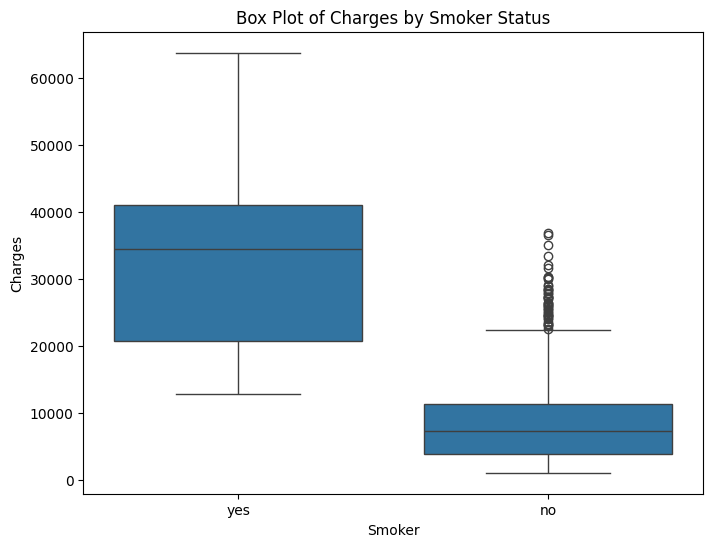

In [62]:
# Create visualizations: histograms, box plots, and scatter plots

# Histogram of charges
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of charges by smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=dataframe)
plt.title('Box Plot of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

## Implement functionality to calculate confidence intervals for sample means

In [63]:
from scipy import stats 
def calculate_confidence_interval(data, confidence=0.95):
    """
    Calculate confidence interval for sample mean.
    
    Parameters:
        data (array-like): The data from which to calculate the confidence interval.
        confidence (float): The level of confidence for the interval, default is 0.95.
    
    Returns:
        tuple: The confidence interval for the sample mean.
    """
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)  # ddof=1 for sample standard deviation
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - margin_of_error, mean + margin_of_error

# Example of calculating confidence interval for charges
charges = dataframe['charges']
confidence_interval = calculate_confidence_interval(charges)

# Round the confidence interval values to two decimal places
rounded_confidence_interval = tuple(round(value, 2) for value in confidence_interval)

print("\nConfidence Interval for Charges (95%):", rounded_confidence_interval)




Confidence Interval for Charges (95%): (12620.95, 13919.89)


## Perform inferential statistics for group comparisons

### T-test: Comparing charges between smokers and non-smokers

In [64]:
# Perform inferential statistics for group comparisons
from scipy.stats import ttest_ind
# T-test: Comparing charges between smokers and non-smokers
smoker_charges = dataframe[dataframe['smoker'] == 'yes']['charges']
non_smoker_charges = dataframe[dataframe['smoker'] == 'no']['charges']

t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(f'\nT-test: t-statistic = {round(t_stat,2)}, p-value = {p_value}')


T-test: t-statistic = 46.66, p-value = 8.271435842179101e-283


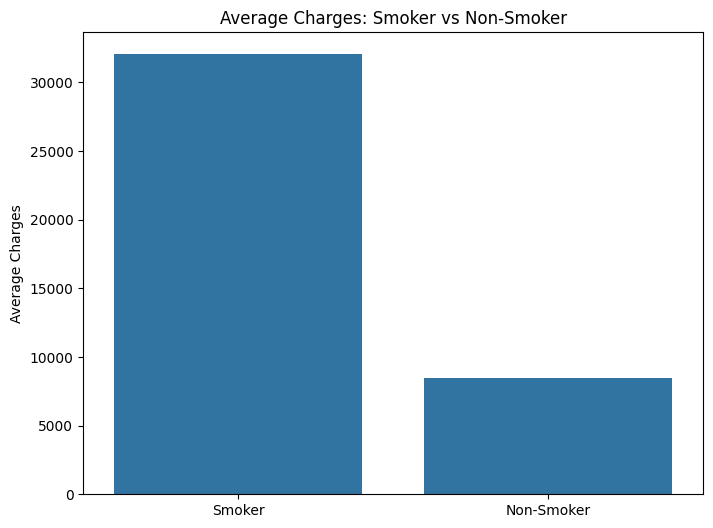

In [65]:
# Visualize t-test results
plt.figure(figsize=(8, 6))
sns.barplot(x=['Smoker', 'Non-Smoker'], y=[np.mean(smoker_charges), np.mean(non_smoker_charges)])
plt.title('Average Charges: Smoker vs Non-Smoker')
plt.ylabel('Average Charges')
plt.show()

### ANOVA: Comparing charges across regions

In [66]:
# ANOVA: Comparing charges across regions
from scipy.stats import f_oneway

f_stat, p_value_anova = f_oneway(dataframe['charges'][dataframe['region'] == 'southwest'],
                                  dataframe['charges'][dataframe['region'] == 'southeast'],
                                  dataframe['charges'][dataframe['region'] == 'northwest'],
                                  dataframe['charges'][dataframe['region'] == 'northeast'])
print(f'ANOVA: F-statistic = {f_stat}, p-value = {p_value_anova}')

ANOVA: F-statistic = 2.96962669358912, p-value = 0.030893356070506986


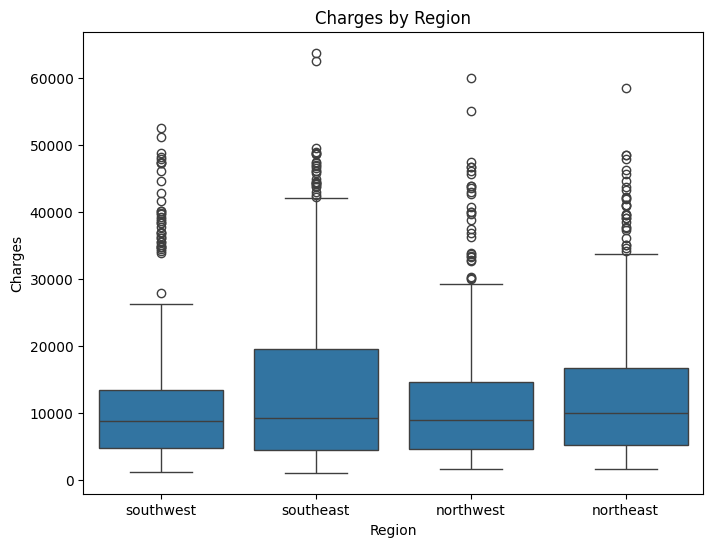

In [67]:
# Visualize ANOVA results
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=dataframe)
plt.title('Charges by Region')
plt.ylabel('Charges')
plt.xlabel('Region')
plt.show()

### Linear regression with age, BMI, children, and smoking status predicting medical charges

In [83]:
# Regression Analysis
import statsmodels.api as sm
import pandas as pd

# Convert 'sex', 'smoker', and 'region' variables to dummy variables
sex_dummy = pd.get_dummies(dataframe['sex'], drop_first=True, prefix='sex')
smoker_dummy = pd.get_dummies(dataframe['smoker'], drop_first=True, prefix='smoker')
region_dummy = pd.get_dummies(dataframe['region'], drop_first=True, prefix='region')


# Combine dummy variables with numeric variables
X = pd.concat([dataframe[['age', 'bmi', 'children']], sex_dummy, smoker_dummy, region_dummy], axis=1)

# Define target variable
y = dataframe['charges']

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Print unique values in non-numeric columns
for column in non_numeric_columns:
    print(column, ":", X[column].unique())

# Convert dummy variables to integers
X['sex_male'] = X['sex_male'].astype(int)
X['smoker_yes'] = X['smoker_yes'].astype(int)
X['region_northwest'] = X['region_northwest'].astype(int)
X['region_southeast'] = X['region_southeast'].astype(int)
X['region_southwest'] = X['region_southwest'].astype(int)

# Check data types again
print(X.dtypes)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print("\nRegression Analysis Summary:")
print(model.summary())

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print("\nRegression Analysis Summary:")
print(model.summary())


Non-numeric columns: Index(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')
sex_male : [False  True]
smoker_yes : [ True False]
region_northwest : [False  True]
region_southeast : [False  True]
region_southwest : [ True False]
age                   int64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

Regression Analysis Summary:
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.

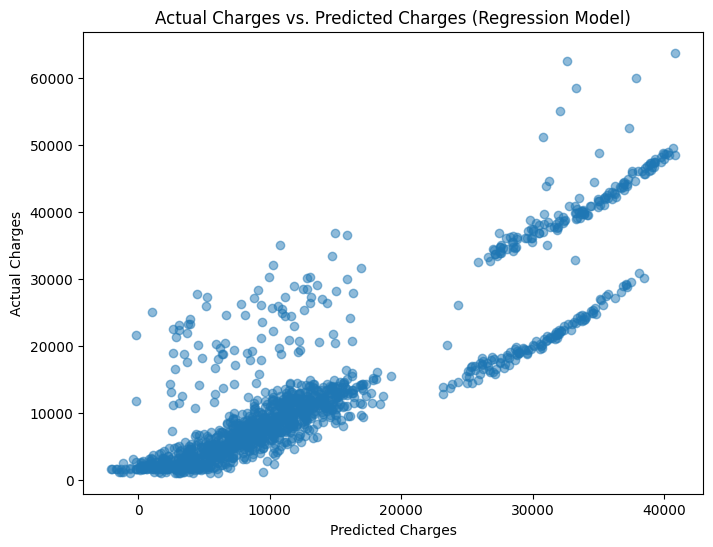

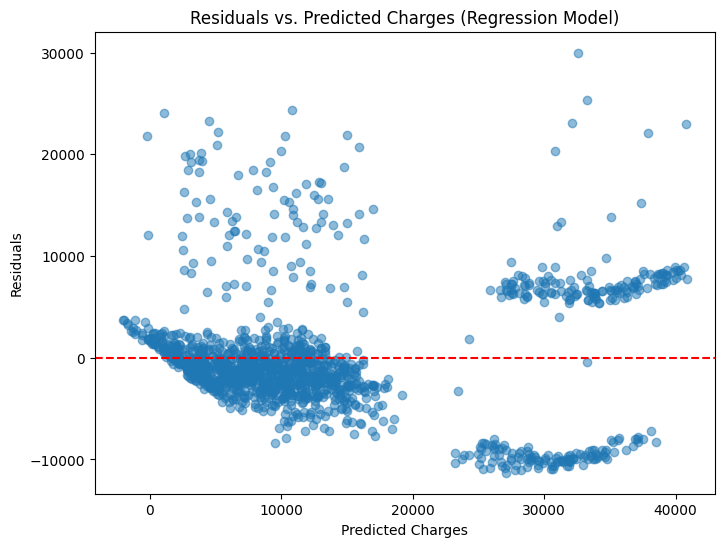

In [86]:
# Scatter plot of actual charges vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(model.predict(), y, alpha=0.5)
plt.title('Actual Charges vs. Predicted Charges (Regression Model)')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.show()

# Plot residuals
residuals = model.resid
plt.figure(figsize=(8, 6))
plt.scatter(model.predict(), residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Charges (Regression Model)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Code Explanation

In [87]:
# Provide explanations
print("\n---------------------------------------------")
print("Explanation:")
print("- Descriptive statistics, including mean, median, quartiles, standard deviation, and count, provide a summary of the distribution of each numerical variable in the dataset.")
print("- Mode represents the most frequent value in each column.")
print("- Visualizations such as histograms and box plots help visualize the distribution and identify potential outliers.")
print("- Confidence intervals for sample means provide an estimate of the range in which the population mean is likely to fall, given a certain level of confidence.")
print("- T-tests and ANOVA are used for group comparisons, assessing differences in charges based on different categorical variables.")
print("- Regression analysis allows us to understand the relationship between predictors (age, BMI, children, smoker status) and the target variable (charges), and to make predictions based on these relationships.")
print("---------------------------------------------")


---------------------------------------------
Explanation:
- Descriptive statistics, including mean, median, quartiles, standard deviation, and count, provide a summary of the distribution of each numerical variable in the dataset.
- Mode represents the most frequent value in each column.
- Visualizations such as histograms and box plots help visualize the distribution and identify potential outliers.
- Confidence intervals for sample means provide an estimate of the range in which the population mean is likely to fall, given a certain level of confidence.
- T-tests and ANOVA are used for group comparisons, assessing differences in charges based on different categorical variables.
- Regression analysis allows us to understand the relationship between predictors (age, BMI, children, smoker status) and the target variable (charges), and to make predictions based on these relationships.
---------------------------------------------
